# Mapping atom analysis
Valid for experiments from 2025-04-30 until ...


In [442]:
date_filters = ["2025-05-20","2025-05-21"]

from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
import csv
import numpy as np
import os,sys
import PIL # for reading tif images
import h5py
import datetime as dt
import time
from scipy.optimize import curve_fit
from skimage.filters import threshold_otsu
from IPython.display import display, HTML ## for large prints
import math

sys.path.append("..\\")
from h5_data_utilities import * # helper functions for dealing with h5 files

def average_over_measurement(measurements, history):
    iteration = len(history) // measurements
    mean_by_iteration = [np.mean(history[j * measurements:(j + 1) * measurements]) for j in range(iteration)]
    return mean_by_iteration


fnames = get_files_by_criteria(date_filters, # only find files from these date directories
                               name_filters=["GeneralVariableScan"], # only find files containing all these strings
                               condition=lambda filename: True, # use this to filter by experiment parameters, like this: lambda filename: np.bool_(h5py.File(filename)['datasets']['set_current_coil_volts_at_finish'])
                               start_dir=results,
                               include_path=True, # if False, only return the name of the file, not the full path
                               print_filenames=True
)


only_show_i_greater_than = -1

print(f"found {len(fnames)} files")
for i,f in enumerate(fnames):
    if i > only_show_i_greater_than:
        try:
            ds = h5py.File(os.path.join(results, f))['datasets']
            scan_str = str_from_h5(ds['scan_variable1_name'])
            if str_from_h5(ds['scan_variable2_name']) != '':
                scan_str += ", " +str_from_h5(ds['scan_variable2_name'])
            print(f"file {i} ({f}) scanned over "+scan_str)
        except:

            print(f"oops... something wrong with {f}")

found 215 files
file 0 (C:\Networking Experiment\artiq codes\artiq-master\results\2025-05-20\08\000025618-GeneralVariableScan.h5) scanned over t_FORT_drop
file 1 (C:\Networking Experiment\artiq codes\artiq-master\results\2025-05-20\08\000025618-GeneralVariableScan_atom_loading_2_scan_over_t_FORT_drop.h5) scanned over t_FORT_drop
file 2 (C:\Networking Experiment\artiq codes\artiq-master\results\2025-05-20\08\000025621-GeneralVariableScan.h5) scanned over t_FORT_drop
file 3 (C:\Networking Experiment\artiq codes\artiq-master\results\2025-05-20\08\000025621-GeneralVariableScan_microwave_Rabi_2_scan_over_t_FORT_drop.h5) scanned over t_FORT_drop
file 4 (C:\Networking Experiment\artiq codes\artiq-master\results\2025-05-20\08\000025622-GeneralVariableScan.h5) scanned over t_FORT_drop
file 5 (C:\Networking Experiment\artiq codes\artiq-master\results\2025-05-20\08\000025622-GeneralVariableScan_atom_loading_scan_over_t_FORT_drop.h5) scanned over t_FORT_drop
file 6 (C:\Networking Experiment\artiq 

experiment: microwave_freq_scan_with_photons_experiment
override: {'dummy_variable':4,'t_microwave_pulse':24.*us,'p_excitation':-40.0}
# of iterations:  50
center=338207154.9100, sigma=13267.4868, depth=0.9999
experiment: microwave_freq_scan_with_photons_experiment
override: {'dummy_variable':4,'t_microwave_pulse':24.*us,'p_excitation':-40.0}
# of iterations:  50
center=338205022.4963, sigma=13384.8970, depth=0.9939
experiment: microwave_freq_scan_with_photons_experiment
override: {'dummy_variable':4,'t_microwave_pulse':24.*us,'p_excitation':-40.0}
# of iterations:  50
center=338204255.9346, sigma=13591.6526, depth=0.9895
experiment: microwave_freq_scan_with_photons_experiment
override: {'dummy_variable':4,'t_microwave_pulse':24.*us,'p_excitation':-40.0}
# of iterations:  50
center=338204169.1688, sigma=13814.0236, depth=0.9999
experiment: microwave_freq_scan_with_photons_experiment
override: {'dummy_variable':4,'t_microwave_pulse':24.*us,'p_excitation':-40.0}
# of iterations:  50
cent

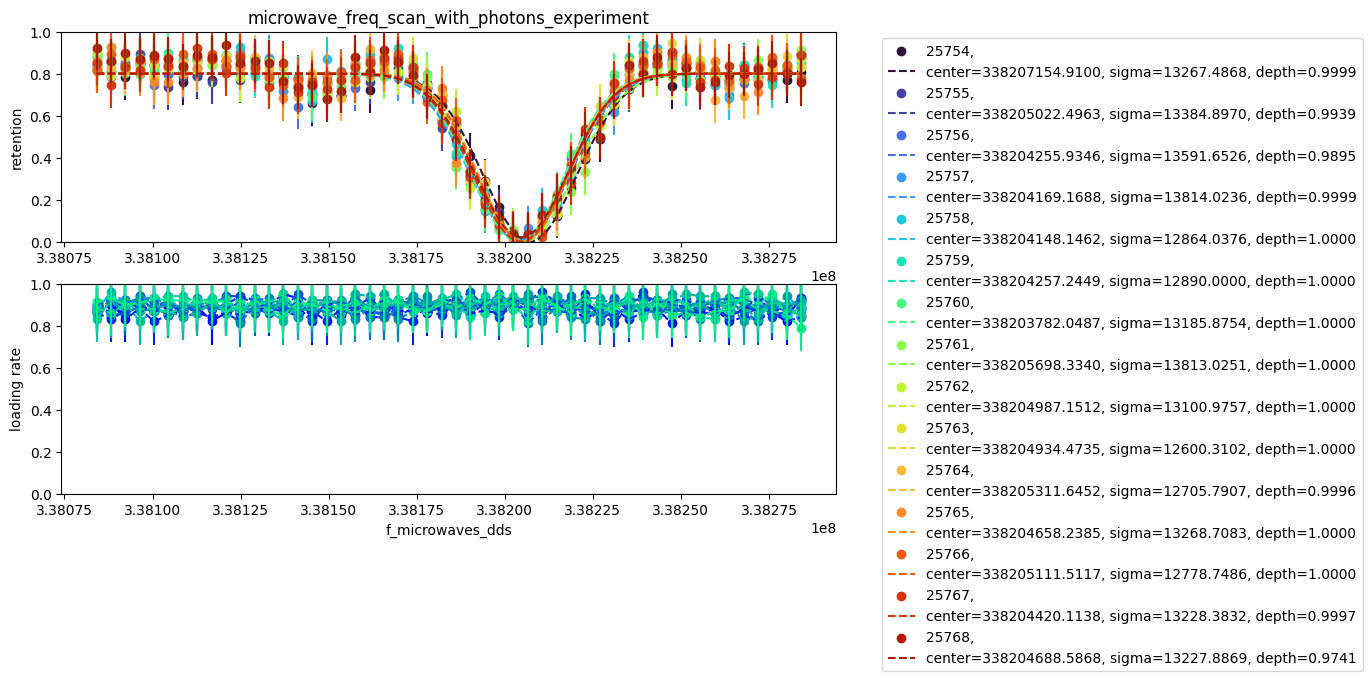

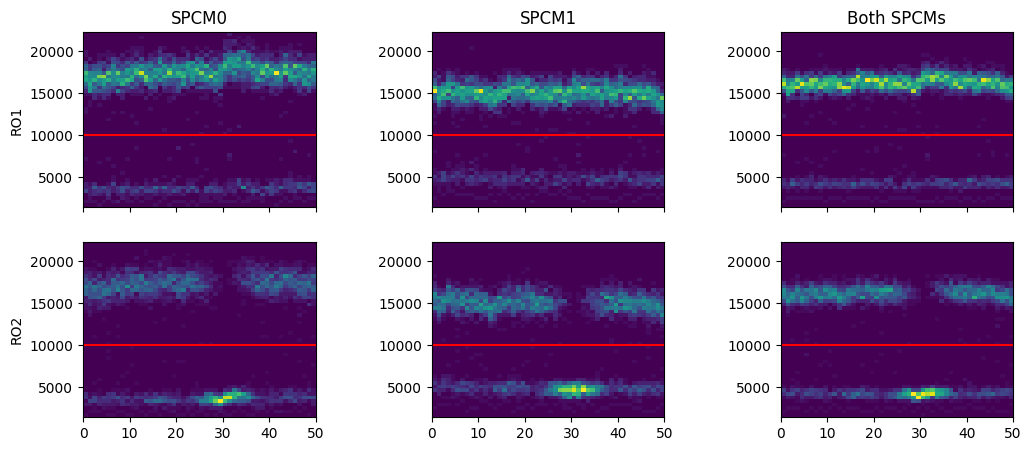

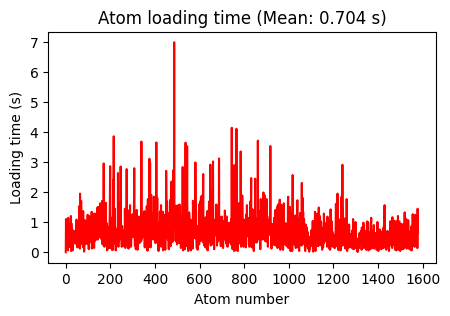

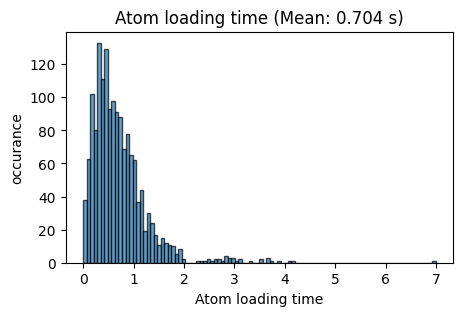

In [443]:
### the file(s) to analyze:
file_indices = {
    185:'',
    187:'',
    189:'',
    191:'',
    193:'',
    195:'',
    197:'',
    199:'',
    201:'',
    203:'',
    205:'',
    207:'',
    209:'',
    211:'',
    213:'',
} 

compare = True # compare multiple files in the same retention and loading plots
otsu_threshold = False # compute threshold using Otsu method instead doing it by eye. only work when require atom loading = False
showhist = True
showloading = True
custom_xlabel = True
merge_data = False # if True, the datasets will be combined, and if fit=True, the new merged data will be fit. don't try this in 2D
fit = True

showhist_counts = False 

# for plotting
legend_vars =[]   #legend_vars = ['AY_volts_OP', 'f_microwaves_dds'] # will be included in the plot legend
xform_and_label = {}
loc='best'
ret_cmap = mpl.colormaps['turbo']
ldng_cmap = mpl.colormaps['winter']

if compare:
    if showloading:
        fig_ret,axes = plt.subplots(nrows=2, sharex=False, figsize=(10, 6))
        ax_ret, ax_ldng = axes
    else:
        fig_ret,ax_ret = plt.subplots()


SPCM0_RO1_hists = []
SPCM0_RO2_hists = []
SPCM1_RO1_hists = []
SPCM1_RO2_hists = []
BothSPCMs_RO1_hists = []
BothSPCMs_RO2_hists = []
mean1_by_iteration = []
mean2_by_iteration = []

merged_retention = np.array([])
merged_scan_sequence1 = np.array([])
merged_errs = np.array([])
rid_str = ''


for idx,f_item in enumerate(file_indices.items()):
    f_idx,f_comment = f_item   # idx - f_item = {f_idx: f_comment}
    f = h5py.File(os.path.join(results, fnames[f_idx]))
    rid = f['rid'][()]
    h5_archive_and_datasets_to_locals(f, parent_locals=locals(), quiet=True)
    print("experiment:",experiment_function)
    print("override:",override_ExperimentVariables)

    iterations = len(scan_sequence1) #int(len(SPCM0_RO1)/n_measurements)
    print("# of iterations: ", iterations)
    
    if otsu_threshold:
        thresh = threshold_otsu(BothSPCMs_RO1)
        print("threshold_otsu: ", thresh)
    else:
        cutoff1 = cutoff2 = single_atom_threshold * t_SPCM_first_shot

    
    ### for plotting 
    ### xsteps_xform is a function that can transform scan_sequence1 for plotting. Here it is equal to identity, i.e. no change in scan_sequence1.
    if scan_variable1_name in xform_and_label and custom_xlabel:
        xsteps_xform, xlabel = (xform_and_label[scan_variable1_name]['xsteps_xform'], xform_and_label[scan_variable1_name]['xlabel'])
    else:
        xsteps_xform, xlabel = (lambda x: x, scan_variable1_name)
        

    legend_string = ''
    for a in legend_vars:
        legend_string += f'{a}={locals()[a]}, '
    legend_string = legend_string[:-2]
    f_comment += legend_string

    
    ### get_loading_and_retention
    ### These array have length = iterations
    retention_array, loading_rate_array, n_atoms_loaded_array = get_loading_and_retention(BothSPCMs_RO1, BothSPCMs_RO2, n_measurements, iterations, cutoff1, otsu=otsu_threshold)


    ### Necessary to analyze data with 2 scan_sequences
    ### reshaping each array into a 2D array with shape = shape, with order = 'F' (Fortran-style) to sort column by column
    
    ncols = len(scan_sequence2)
    nrows = len(scan_sequence1)
    shape = (len(scan_sequence2),len(scan_sequence1))
    loading_rate_raveled = np.reshape(loading_rate_array,shape,order='F') # rows have constant variable2
    n_atoms_loaded_raveled = np.reshape(n_atoms_loaded_array,shape,order='F') # rows have constant variable2
    retention_raveled = np.reshape(retention_array,shape,order='F') # rows have constant variable2

    
    ### show historam of first_shot and second_shot
    histMin = np.min([SPCM0_RO1, SPCM0_RO2, SPCM1_RO1, SPCM1_RO2])/t_SPCM_first_shot ## boundary for the histogram plots
    histMax = np.max([SPCM0_RO1, SPCM0_RO2, SPCM1_RO1, SPCM1_RO2])/t_SPCM_first_shot
    if showhist:
        SPCM0_RO1_hists.append(
            [np.histogram(SPCM0_RO1[i*n_measurements:(i+1)*n_measurements]/t_SPCM_first_shot,bins=np.linspace(histMin,histMax,50))[0]
                              for i in range(iterations)])

        SPCM0_RO2_hists.append(
            [np.histogram(SPCM0_RO2[i*n_measurements:(i+1)*n_measurements]/t_SPCM_second_shot,bins=np.linspace(histMin,histMax,50))[0]
                              for i in range(iterations)])

        SPCM1_RO1_hists.append(
            [np.histogram(SPCM1_RO1[i*n_measurements:(i+1)*n_measurements]/t_SPCM_first_shot,bins=np.linspace(histMin,histMax,50))[0]
                              for i in range(iterations)])

        SPCM1_RO2_hists.append(
            [np.histogram(SPCM1_RO2[i*n_measurements:(i+1)*n_measurements]/t_SPCM_second_shot,bins=np.linspace(histMin,histMax,50))[0]
                              for i in range(iterations)])
        
        BothSPCMs_RO1_hists.append(
            [np.histogram(BothSPCMs_RO1[i*n_measurements:(i+1)*n_measurements]/t_SPCM_first_shot,bins=np.linspace(histMin,histMax,50))[0]
                              for i in range(iterations)])

        BothSPCMs_RO2_hists.append(
            [np.histogram(BothSPCMs_RO2[i*n_measurements:(i+1)*n_measurements]/t_SPCM_second_shot,bins=np.linspace(histMin,histMax,50))[0]
                              for i in range(iterations)])

    
    ### plot a retention curve vs variable 1 for each variable 2 value
    for i, retention, loading, n_loaded, var2 in zip(range(len(scan_sequence2)), retention_raveled, loading_rate_raveled, n_atoms_loaded_raveled, scan_sequence2):
        
        errs = np.array([1/np.sqrt(n) if n > 0 else np.inf for n in n_loaded])
        if not compare:
            if showloading:
                    fig_ret,axes = plt.subplots(nrows=2, sharex=False)
                    ax_ret, ax_ldng = axes
            else:
                fig_ret,ax_ret = plt.subplots()
                
        if not merge_data:
            ax_ret.scatter(xsteps_xform(scan_sequence1)[loading > 0], retention[loading > 0], label=str(rid)+', '+f_comment, color=ret_cmap(idx/len(file_indices)))
            ax_ret.errorbar(xsteps_xform(scan_sequence1)[loading > 0], retention[loading > 0], errs[loading > 0], ls='none',color=ret_cmap(idx/len(file_indices)))
            ax_ret.set_ylim((0,1))

            ### for fitting
            ### Auto-detect rough center from minimum retention
            fit_dict = {}
            min_idx = np.argmin(retention_array)
            initial_center = scan_sequence1[min_idx]
            p0 = [initial_center, 10e3, 0.9] # [center, width, depth]
            
            ### using a  Gaussian function for now:
            fit_dict = {
                scan_variable1_name: {
                    'model': lambda x, center, sigma, depth: 0.80*(1 - depth * np.exp(-((x - center)**2/(2*sigma**2)))),
                    'p0': p0,
                    'bounds': ([min(scan_sequence1), 0, 0], [max(scan_sequence1), np.inf, 1]),
                    'params': ['center', 'sigma', 'depth']
                }
            }

            if not ncols > 1 and fit and scan_variable1_name in fit_dict:
                popt, _ = curve_fit(f=fit_dict[scan_variable1_name]['model'], xdata=scan_sequence1, ydata=retention, p0=fit_dict[scan_variable1_name]['p0'], bounds=fit_dict[scan_variable1_name]['bounds'])
                fit_str = "".join([f'{p}={v:.4f}, ' for p,v in zip(fit_dict[scan_variable1_name]['params'], popt)])[:-2]
                print(fit_str)
                hi_res_x = np.linspace(scan_sequence1[0], scan_sequence1[-1], 10*len(scan_sequence1))
                hi_res_x_xform = np.linspace(xsteps_xform(scan_sequence1)[0], xsteps_xform(scan_sequence1)[-1], 10*len(scan_sequence1))
                ax_ret.plot(hi_res_x_xform, fit_dict[scan_variable1_name]['model'](hi_res_x, *popt),linestyle='--',color=ret_cmap(idx/len(file_indices)),label=fit_str)
            else:
                ax_ret.plot(xsteps_xform(scan_sequence1)[loading > 0], retention[loading > 0],linestyle='--',color=ret_cmap(idx/len(file_indices)))
    
            if not showloading:
                ax_ret.set_xlabel(xlabel)
            ax_ret.set_ylabel("retention")
            #ax_ret.legend(loc=loc)
            ax_ret.legend(bbox_to_anchor=(1.05, 1), loc='upper left')      # This will show the legend outside the plot
            
        else:
            merged_retention = np.concatenate((merged_retention,retention[loading > 0]))
            merged_scan_sequence1 = np.concatenate((merged_scan_sequence1, scan_sequence1[loading > 0]))
            merged_errs = np.concatenate((merged_errs, errs[loading > 0]))
            rid_str += str(rid) + ', '
    
        if showloading:
            ax_ldng.plot(xsteps_xform(scan_sequence1)[loading > 0], loading[loading > 0], linestyle='--',color=ldng_cmap(idx/len(file_indices)))
            ax_ldng.scatter(xsteps_xform(scan_sequence1)[loading > 0], loading[loading > 0], label=rid, color=ldng_cmap(idx/len(file_indices)))
            errs = np.array([1/np.sqrt(n) if n > 0 else np.inf for n in n_loaded])
            ax_ldng.errorbar(xsteps_xform(scan_sequence1)[loading > 0], loading[loading > 0], errs[loading > 0], ls='none', color=ldng_cmap(idx/len(file_indices)))
            ax_ldng.set_ylim((0,1))
            ax_ldng.set_xlabel(xlabel)
            ax_ldng.set_ylabel("loading rate")


if merge_data:
    retention = merged_retention
    scan_sequence1 = merged_scan_sequence1
    errs = merged_errs

    ax_ret.scatter(xsteps_xform(scan_sequence1), retention, color='plum')
    ax_ret.errorbar(xsteps_xform(scan_sequence1), retention, errs, ls='none',color='plum')
    ax_ret.set_ylim((0,1))
    
    if not ncols > 1 and fit and scan_variable1_name in fit_dict:        
        popt, _ = curve_fit(f=fit_dict[scan_variable1_name]['model'], xdata=scan_sequence1, ydata=retention, p0=fit_dict[scan_variable1_name]['p0'], bounds=fit_dict[scan_variable1_name]['bounds'])
        hi_res_x = np.linspace(scan_sequence1[0], scan_sequence1[-1], 10*len(scan_sequence1))
        hi_res_x_xform = np.linspace(xsteps_xform(scan_sequence1)[0], xsteps_xform(scan_sequence1)[-1], 10*len(scan_sequence1))
        fit_str = "".join([f'{p}={v:.4f}, ' for p,v in zip(fit_dict[scan_variable1_name]['params'], popt)])[:-2]
        print(fit_str)
        ax_ret.plot(hi_res_x_xform, fit_dict[scan_variable1_name]['model'](hi_res_x, *popt),linestyle='--',color='violet', label=fit_str)
        ax_ret.legend()
    else:
        ax_ret.plot(xsteps_xform(scan_sequence1), retention,linestyle='--',color='violet')


if not compare or len(file_indices)==1:
    ax_ret.set_title(experiment_function+' '+str(rid))
elif merge_data:
    ax_ret.set_title(experiment_function+' '+ rid_str[:-2])
else:
    ax_ret.set_title(experiment_function)

if showhist:
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 5), sharex=True)  # 2 rows, 3 columns
    ax, ax2, ax3, ax4, ax5, ax6 = axes.ravel()  # Flatten the 2D axes array for easier unpacking

    ### Plot for SPCM0 RO1 in the 1st row, 1st column
    cax = ax.imshow(np.array(SPCM0_RO1_hists[0]).transpose(), origin='lower', extent=[0, iterations, histMin, histMax])
    ax.set_ylabel("RO1")
    ax.axhline(cutoff1 / t_SPCM_first_shot, color='red')
    ax.set_aspect('auto')
    ax.set_title("SPCM0")

    ### Plot for SPCM1 RO1 in the 1st row, 2nd column
    cax2 = ax2.imshow(np.array(SPCM1_RO1_hists[0]).transpose(), origin='lower', extent=[0, iterations, histMin, histMax])
    ax2.axhline(cutoff1 / t_SPCM_first_shot, color='red')
    ax2.set_aspect('auto')
    ax2.set_title("SPCM1")

    ### Plot for BothSPCMs RO1 in the 1st row, 3rd column
    cax3 = ax3.imshow(np.array(BothSPCMs_RO1_hists[0]).transpose(), origin='lower', extent=[0, iterations, histMin, histMax])
    ax3.axhline(cutoff1 / t_SPCM_first_shot, color='red')
    ax3.set_aspect('auto')
    ax3.set_title("Both SPCMs")

    ### Plot for SPCM0 RO2 in the 2nd row, 1st column
    cax4 = ax4.imshow(np.array(SPCM0_RO2_hists[0]).transpose(), origin='lower', extent=[0, iterations, histMin, histMax])
    ax4.set_ylabel("RO2")
    ax4.axhline(cutoff2 / t_SPCM_first_shot, color='red')
    ax4.set_aspect('auto')

    ### Plot for SPCM1 RO2 in the 2nd row, 2nd column
    cax5 = ax5.imshow(np.array(SPCM1_RO2_hists[0]).transpose(), origin='lower', extent=[0, iterations, histMin, histMax])
    ax5.axhline(cutoff2 / t_SPCM_first_shot, color='red')
    ax5.set_aspect('auto')

    ### Plot for BothSPCMs RO2 in the 2nd row, 3rd column
    cax6 = ax6.imshow(np.array(BothSPCMs_RO2_hists[0]).transpose(), origin='lower', extent=[0, iterations, histMin, histMax])
    ax6.axhline(cutoff2 / t_SPCM_first_shot, color='red')
    ax6.set_aspect('auto')

    plt.subplots_adjust(hspace=0.2, wspace=0.5)
plt.show()

#######  Atom loading time plot
## We can slice the array to separate iterations later, if we want.
mean_loading_time = np.mean(Atom_loading_time)  
plt.figure(figsize=(5, 3))
plt.plot(Atom_loading_time, 'r-')

plt.xlabel("Atom number")
plt.ylabel("Loading time (s)")
plt.title(f"Atom loading time (Mean: {mean_loading_time:.3f} s)")  
plt.show()

plt.figure(figsize=(5, 3))
plt.hist(Atom_loading_time, bins=100, edgecolor='black', alpha=0.7)
# plt.plot(Atom_loading_time, 'r-')

plt.xlabel("Atom loading time")
plt.ylabel("occurance")
plt.title(f"Atom loading time (Mean: {mean_loading_time:.3f} s)")  
plt.show()

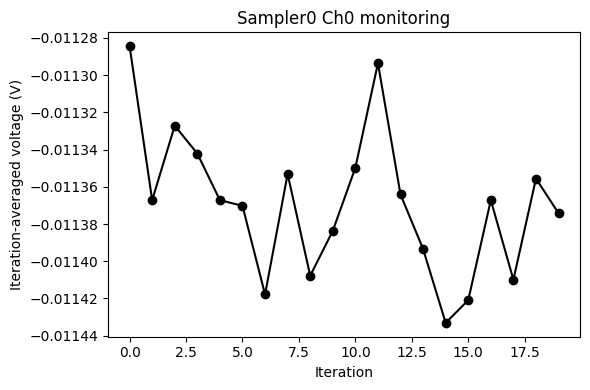

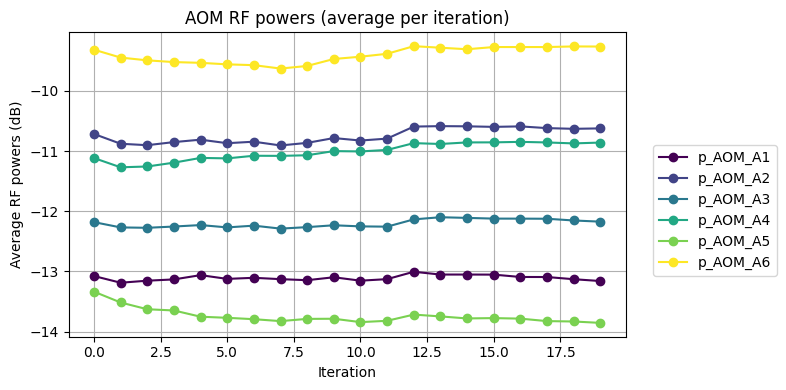

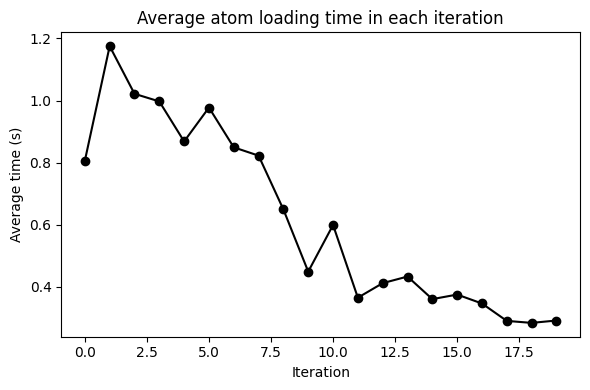

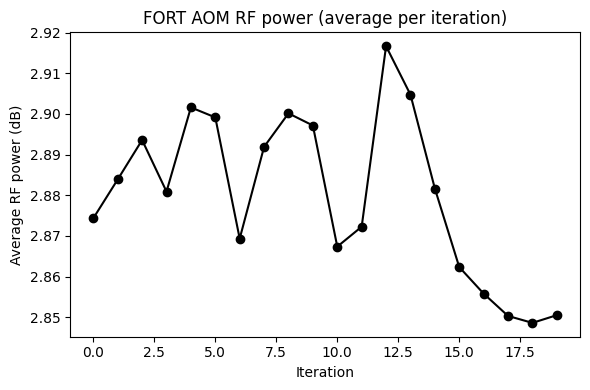

In [436]:
"""
Calculating and plotting the iteration averaged RF powers to the AOMs, along with the atom loading time. This requires n_feedback_per_iteration 
and n_atom_loaded_per_iteration datasets which are generated in some experiments.

The goal is to see if there is any correlation between bad atom loading (averaged over an iteration) and RF values (averaged over an iteration). 
This would indicate a Sampler issue, for example.

n_feedback_per_iteration[1:] = [2,2,3,2,5,...], with len()=iteration, shows the number of times the feedback ran in each iteration. Therefore, it is used to 
splice the RF power arrays, like p_AOM_A1_history, into subarrays for each iteration (first subarray for the first iteration, etc.).
"""

######## Splice the sampler testing array and average over each iteration
Sampler0_ch0_iteration_ave = []
start = 0
for i in range(iterations):
    subset = Sampler0_test[1:][i*n_measurements:(i+1)*n_measurements]
    avg = np.mean(subset)
    Sampler0_ch0_iteration_ave.append(avg)

plt.figure(figsize=(6, 4))
plt.plot(Sampler0_ch0_iteration_ave, marker='o', linestyle='-', color='black')
plt.title('Sampler0 Ch0 monitoring')
plt.xlabel('Iteration')
plt.ylabel('Iteration-averaged voltage (V)')
plt.tight_layout()
plt.show()


### Initialize list of suffixes and colors
channel_suffixes = range(1, 7)
colors = plt.cm.viridis(np.linspace(0, 1, len(channel_suffixes)))

plt.figure(figsize=(8, 4))

##### Loop over each channel to splice p_AOM_Ai_history arrays and average
for i, suffix in enumerate(channel_suffixes):
    var_name = f'p_AOM_A{suffix}_history'
    history = globals()[var_name][1:]  # skip the first element
    n_feedback = n_feedback_per_iteration[1:].astype(int)
    
    ### Compute per-iteration averages
    iteration_averages = []
    start = 0
    for count in n_feedback:
        subset = history[start:start+count]
        avg = np.mean(subset)
        iteration_averages.append(avg)
        start += count
    iteration_averages = np.array(iteration_averages)

    plt.plot(iteration_averages, marker='o', linestyle='-',
             color=colors[i], label=f'p_AOM_A{i+1}')

plt.title('AOM RF powers (average per iteration)')
plt.xlabel('Iteration')
plt.ylabel('Average RF powers (dB)')
plt.legend(loc=(1.05, 0.2))
plt.grid(True)
plt.tight_layout()
plt.show()


##### Splice Atom_loading_time array and average
Atom_loading_time_iteration_ave = []
start = 0
for count in n_atom_loaded_per_iteration[1:].astype(int):
    subset = Atom_loading_time[1:][start:start+count]
    avg = np.mean(subset)
    Atom_loading_time_iteration_ave.append(avg)
    start += count

Atom_loading_time_iteration_ave = np.array(Atom_loading_time_iteration_ave)

plt.figure(figsize=(6, 4))
plt.plot(Atom_loading_time_iteration_ave, marker='o', linestyle='-', color='black')
plt.title('Average atom loading time in each iteration')
plt.xlabel('Iteration')
plt.ylabel('Average time (s)')
plt.tight_layout()
plt.show()


###### Splice p_FORT_loading_history array and average
p_FORT_loading_history_iteration_ave = []
start = 0
for count in n_feedback_per_iteration[1:].astype(int):
    subset = p_FORT_loading_history[1:][start:start+count]
    avg = np.mean(subset)
    p_FORT_loading_history_iteration_ave.append(avg)
    start += count

p_FORT_loading_history_iteration_ave = np.array(p_FORT_loading_history_iteration_ave)

plt.figure(figsize=(6, 4))
plt.plot(p_FORT_loading_history_iteration_ave, marker='o', linestyle='-', color='black')
plt.title('FORT AOM RF power (average per iteration)')
plt.xlabel('Iteration')
plt.ylabel('Average RF power (dB)')
plt.tight_layout()
plt.show()



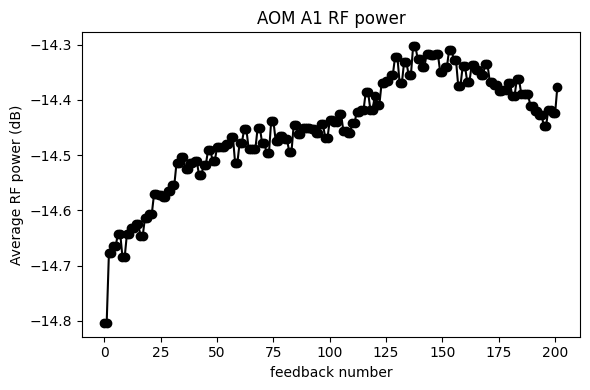

In [282]:
plt.figure(figsize=(6, 4))
plt.plot(p_AOM_A1_history, marker='o', linestyle='-', color='black')
plt.title('AOM A1 RF power')
plt.xlabel('feedback number')
plt.ylabel('Average RF power (dB)')
plt.tight_layout()
plt.show()

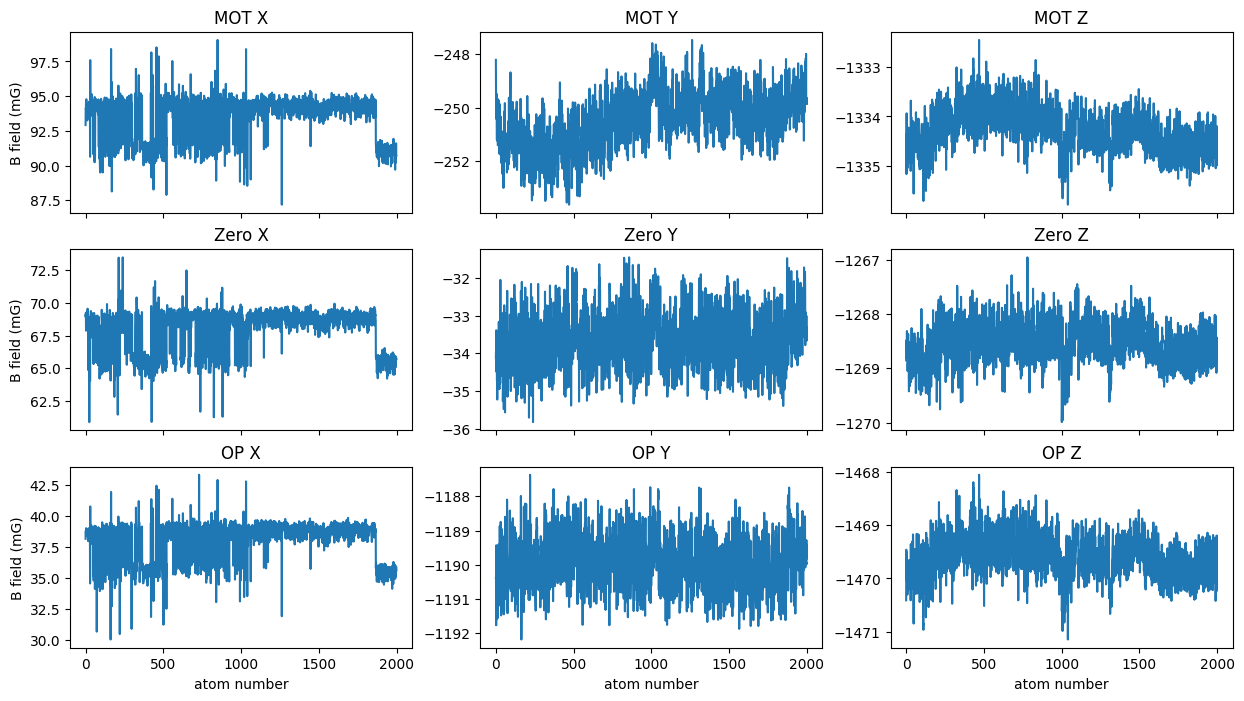

In [431]:
"""
Plotting the magnetometer added to ARTIQ since 2025-04-19.
For all atom loading events. Note that the magneometer is measured in every "measurement", not necessarily when 

"""
fig, axs = plt.subplots(3, 3, figsize=(15, 8), sharey=False, sharex=True)

######## MOT
axs[0, 0].plot(Magnetometer_MOT_X[1:])
axs[0, 0].set_ylabel("B field (mG)")
axs[0, 0].set_title("MOT X")

axs[0, 1].plot(Magnetometer_MOT_Y[1:])
axs[0, 1].set_title("MOT Y")

axs[0, 2].plot(Magnetometer_MOT_Z[1:])
axs[0, 2].set_title("MOT Z");


######## Zero
axs[1, 0].plot(Magnetometer_Zero_X[1:])
axs[1, 0].set_ylabel("B field (mG)")
axs[1, 0].set_title("Zero X")

axs[1, 1].plot(Magnetometer_Zero_Y[1:])
axs[1, 1].set_title("Zero Y")

axs[1, 2].plot(Magnetometer_Zero_Z[1:])
axs[1, 2].set_title("Zero Z");


######## OP
axs[2, 0].plot(Magnetometer_OP_X[1:])
axs[2, 0].set_xlabel("atom number")
axs[2, 0].set_ylabel("B field (mG)")
axs[2, 0].set_title("OP X")

axs[2, 1].plot(Magnetometer_OP_Y[1:])
axs[2, 1].set_xlabel("atom number")
axs[2, 1].set_title("OP Y")

axs[2, 2].plot(Magnetometer_OP_Z[1:])
axs[2, 2].set_xlabel("atom number")
axs[2, 2].set_title("OP Z");





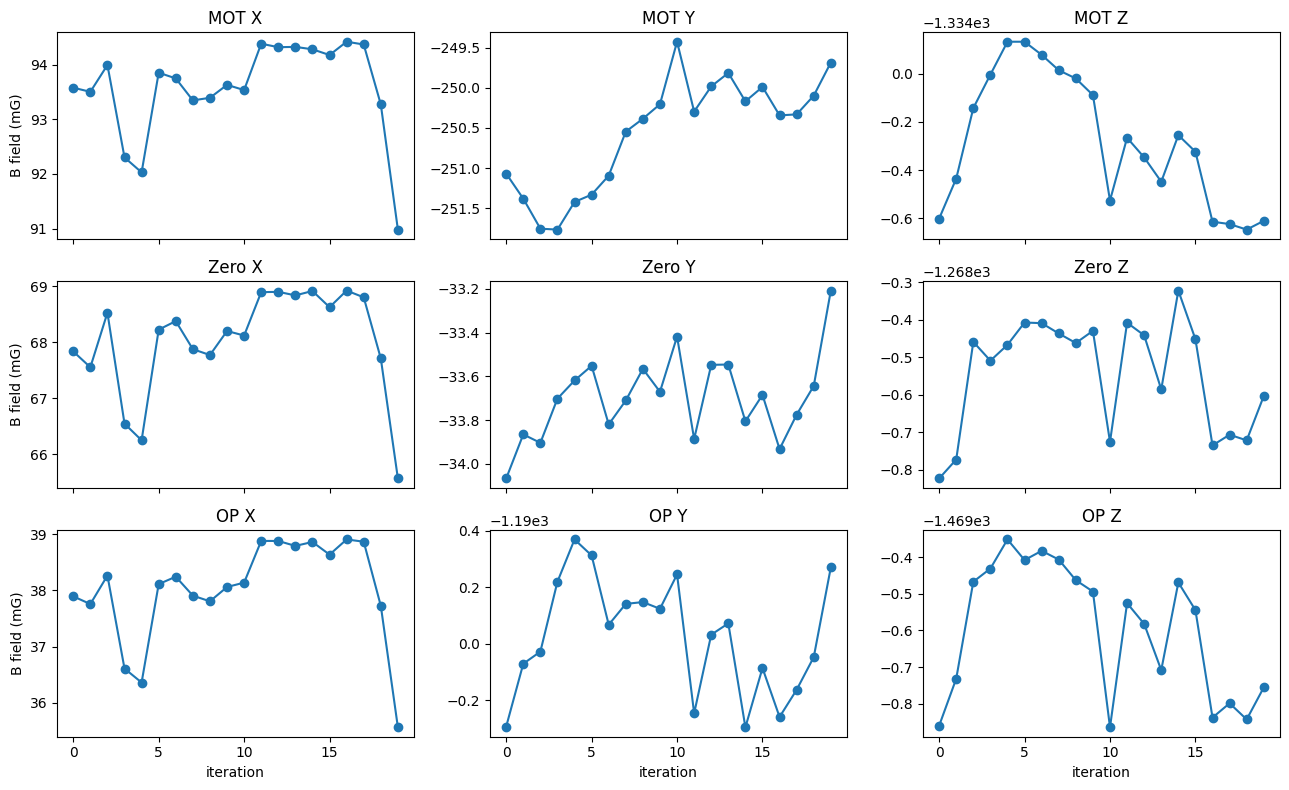

In [432]:
"""
Plotting the magnetometer averaged in each iteration.
For all atom loading events. Note that the magneometer is measured in every "measurement", not necessarily when we load an atom. 

"""

######## Splice the magnetometer data array and average over each iteration
Magnetometer_data = [Magnetometer_MOT_X[1:], Magnetometer_MOT_Y[1:], Magnetometer_MOT_Z[1:], 
                     Magnetometer_Zero_X[1:], Magnetometer_Zero_Y[1:], Magnetometer_Zero_Z[1:],
                     Magnetometer_OP_X[1:], Magnetometer_OP_Y[1:], Magnetometer_OP_Z[1:]]

Magnetometer_data_iteration_ave = [[] for _ in range(len(Magnetometer_data))]

for d in range(len(Magnetometer_data)):
    start = 0
    for i in range(iterations):
        subset = Magnetometer_data[d][i*n_measurements:(i+1)*n_measurements]
        avg = np.mean(subset)
        Magnetometer_data_iteration_ave[d].append(avg)



fig, axs = plt.subplots(3, 3, figsize=(13, 8), sharey=False, sharex=True)
titles = [
    "MOT X", "MOT Y", "MOT Z",
    "Zero X", "Zero Y", "Zero Z",
    "OP X", "OP Y", "OP Z"
]

# ylabels = ["B field (mG)"] * 3 + ["B field (mG)"] * 3 + ["B field (mG)"] * 3
ylabels = ["B field (mG)"] + [""]*2 + ["B field (mG)"] + [""]*2 + ["B field (mG)"] + [""]*2
xlabels = [""] * 6 + ["iteration"] * 3  # Only bottom row gets x-axis labels

for idx, avg_data in enumerate(Magnetometer_data_iteration_ave):
    row = idx // 3
    col = idx % 3
    ax = axs[row, col]
    
    ax.plot(avg_data, marker='o')  # add markers for clarity
    ax.set_title(titles[idx])
    
    if ylabels[idx]:
        ax.set_ylabel(ylabels[idx])
    if xlabels[idx]:
        ax.set_xlabel(xlabels[idx])

plt.tight_layout()
plt.show()


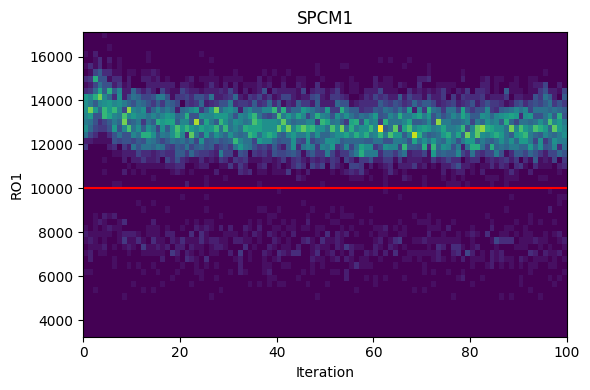

In [195]:
"""
Slicing SPCM1_RO1 into more sections to see the readout fluctuation over time in more details. 

"""

n = 100
ii = 100
SPCM1_RO1_hists = []
SPCM1_RO1_hists.append(
            [np.histogram(SPCM1_RO1[i*n:(i+1)*n]/t_SPCM_first_shot,bins=np.linspace(histMin,histMax,50))[0]
                              for i in range(ii)])

hist_data = np.array(SPCM1_RO1_hists[0]).T  # shape: [bins, ii]

plt.figure(figsize=(6, 4))
plt.imshow(hist_data, origin='lower', extent=[0, ii, histMin, histMax], aspect='auto')

# Add horizontal line at the cutoff
plt.axhline(cutoff1 / t_SPCM_first_shot, color='red')

# Axis labels and title
plt.xlabel("Iteration")
plt.ylabel("RO1")
plt.title("SPCM1")

plt.tight_layout()
plt.show()

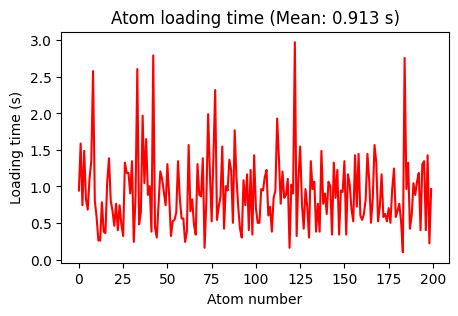

In [257]:
#######  Atom loading time plot
## We can slice the array to separate iterations later, if we want.

data = Atom_loading_time[200:400]

mean_loading_time = np.mean(data)  
plt.figure(figsize=(5, 3))
plt.plot(data, 'r-')

plt.xlabel("Atom number")
plt.ylabel("Loading time (s)")
plt.title(f"Atom loading time (Mean: {mean_loading_time:.3f} s)") 
plt.show()

n_measurements = 5000
excitation pulse width = 30.000000000000004 ns
SPCM window = 200.0 ns
excitation AOM power (dBm) = 2.0
n_excitation_attempts = 5
check atom avery n excitation cycles = 5


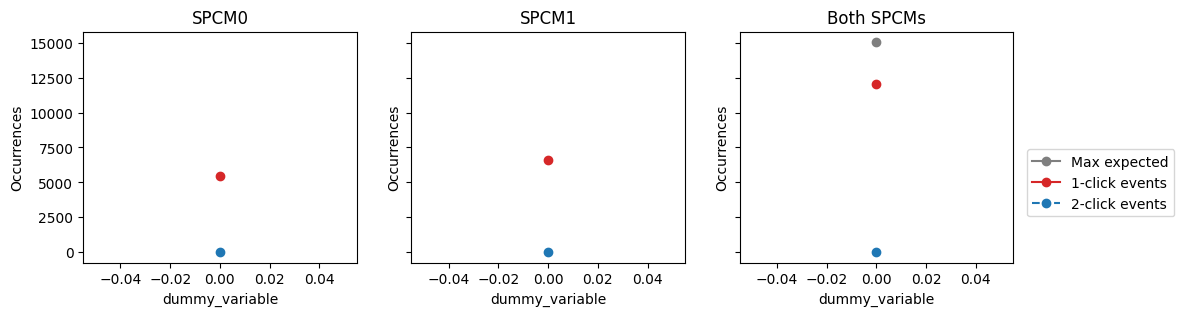

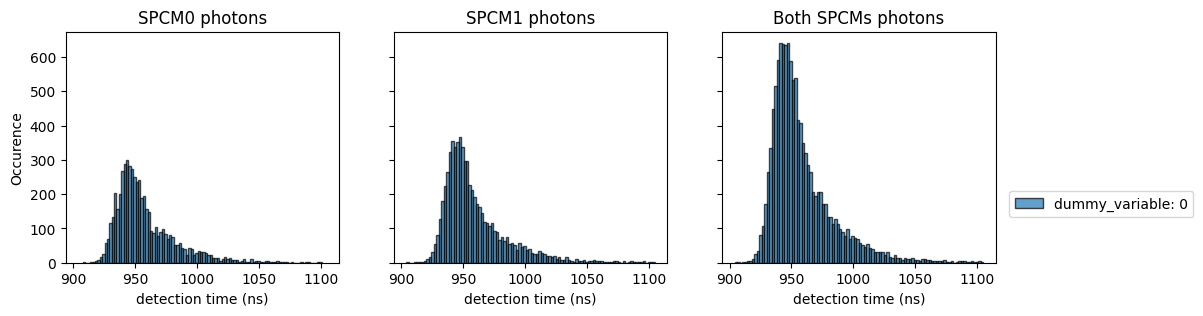

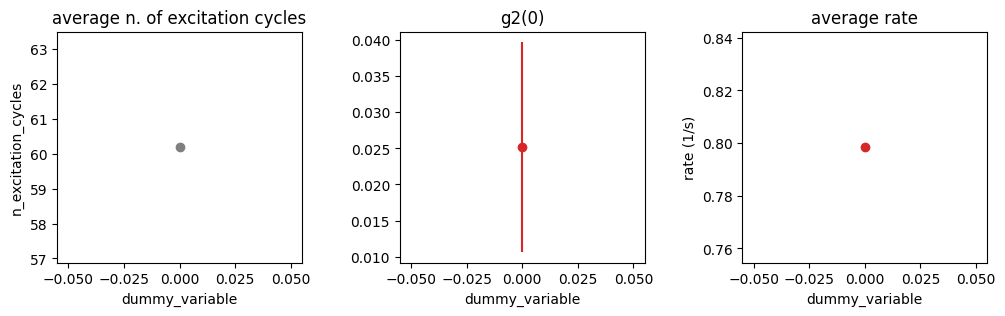

In [280]:
"""
What each variable represents. Example values are mostly from RID 22496, 2025-02-26. Variables ending in _iAll contain data for all interations with length equal to "iterations".

n_measurements = 2000: directly from dataset
iterations = 5: the length of scan_sequence1, directly from dataset
n_excitation_cycles = [0,  2, 20,  8,  2,  8, ...], length = 1 + n_measurements * iterations: the number of excitation cycles in each measurement
n_excitation_cycles_iAll = [16830, 16665, 16488, 16194, 16221], length = iterations: total number of excitation cycles in each iteration as an array.
n_excitation_attempts = 1: directly from dataset. Number of excitation pulses in each excitation cycle.
n_tStamps_iAll = [16830, 16665, 16488, 16194, 16221], length = iterations: total number of timestamps in each iteration as an array. 
SPCM0_SinglePhoton_tStamps = [[0, 0], [-1, -1], [-1, -1], [1.32237714e+06, -1], [-1, -1], ...], length = sum(n_tStamps_iAll) = 82399, for example. Directly from dataset.
SPCM0_tStamps_i =  [[-1, -1], [-1, -1], [1.32237714e+06, -1], [-1, -1], ...], length = elements of n_tStamps_iAll, 16830 for the first iteration, for example. The timestamps in each iteration.
reference_tStamps_t1 = [0, 1322341.65973562, 1322341.65976682, 1322341.65979802, ...], length = sum(n_tStamps_iAll) = 82399, for example. Directly from dataset.
t1_reference_i = [1322341.65973562, 1322341.65976682, 1322341.65979802, ...], length = elements of n_tStamps_iAll, 16830 for the first iteration, for example. The reference times in each iteration.
SPCM0_1click_counts_iAll = [128., 122., 172., 186., 172.], length = iterations: number of 1-click events in each iteration as an array; events in the first column of SPCM0_tStamps_i for different iteration.
SPCM0_2click_counts_iAll = [0., 0., 0., 0., 0.], length = iterations: number of 2-click events in each iteration as an array; events in the second column of SPCM0_tStamps_i for different iteration.
start_indices = [0, 16830, 33495, 49983, 66177], length = iterations: to slice arrays like SPCM0_SinglePhoton_tStamps into iterations. 
    Remember that SPCM0_SinglePhoton_tStamps is a single array with the timestamps for all iterations. 
end_indices = [16830, 33495, 49983, 66177, 82398], length = iterations: same as start_indices
SPCM0_rel_tStamps_i = [1099.89196062, 1088.94892037, 1098.02931547, ...], length = SPCM0_1click_counts_iAll + SPCM0_2click_counts_iAll, for example length is 128 and 122 for first two iterations. 
    This array contains the timestamps relative to the reference time t1 in ns unit. -1 event are excluded and 2-click events are included.
SPCM0_rel_tStamps_iAll = [[1099.89196062, 1088.94892037, 1098.02931547, ...], [..], ..], length = iterations. Arrays of arrays containing all the relative timestamps for all iteration. 
BothSPCMs_tStamps_filtered_i = [[1757511.19383094, 1757533.11171639, ...], length = total number of photons in iteration i, 
    i.e. length = SPCM0_1click_counts_iAll[i] + SPCM1_1click_counts_iAll[i]. Contains all the absolute time stamps from both SPCMs with -1 removed and sorted from small to large.
BothSPCMs_tStamps_filtered_iAll = [[1757511.19383094, 1757533.11171639, ...], [1749316.29104084, 1749328.33163165, ..], ..], length = iterations. Array of arrays keeping all 
    BothSPCMs_tStamps_filtered_i from all iterations.
Ave_photon_rate_iAll = [[0.11084697, 0.1147433 , 0.10952382, 0.1337287 , 0.12123424]], length = iterations. Contains the average photon generation rate for all iterations.
n_coincidence_iAll = [0,0,1,0,2], length = iterations. The number of coincidences in each iteration used to calculate g2. 

Other notes:
1- Does this work if I change max_clicks from 2 to 1 or 3?

"""

### Print the title of the output
display(HTML(f"""<b style='font-size:18px;'> {date_filters[0]} - RID {rid} - {experiment_function}</b>"""))

Col_Eff = 0.05 # overal expected/theoretical collection and detection efficiency 

### Instead of using a large n_measurements, which can sometimes lead to underflow error, we use dummy_variable to split the measurements. 
### So, if scan_variable1_name == 'dummy_variable', we want to combine all iterations into one:
if scan_variable1_name == 'dummy_variable':
    n_measurements = n_measurements * iterations
    iterations = 1
    scan_sequence1 = [0]

## To look at specific iterations, you can select in scan_sequence_1, for example scan_sequence1 = [0,2]. For now, the first element has to be 0.
# scan_sequence1 = [0,4]
# iterations = len(scan_sequence1)
# n_measurements = n_measurements * iterations


n_excitation_cycles_iAll = np.zeros(iterations, dtype=int) ### total number of excitation cycle in each iteration.
n_tStamps_iAll = np.zeros(iterations, dtype=int)  ### number of timestamps in each iteration. 
for i in range(iterations):
    n_excitation_cycles_iAll[i] = sum(n_excitation_cycles[i*n_measurements+1:(i+1)*n_measurements+1]+1)
    if scan_variable1_name == 'n_excitation_attempts':
        n_excitation_attempts = scan_sequence1[i]
    n_tStamps_iAll[i] = n_excitation_cycles_iAll[i] * n_excitation_attempts
    ### Note that n_excitation_cycles varies in each cycle, each contains n_excitation_attempts.
    ### the first +1 is because the first element in each dataset is 0. 
    ### the last +1 is because there is one more cycle than n_excitation_cycles in each loop. See the oscciloscope. For example, if n_excitation_cycles[j] = 2, 
    ### there are 2+1=3 sets of excitation cycles for that measurement. 
   


SPCM0_1click_counts_iAll = np.array([])
SPCM0_2click_counts_iAll = np.array([])
SPCM1_1click_counts_iAll = np.array([])
SPCM1_2click_counts_iAll = np.array([])

BothSPCMs_tStamps_filtered_iAll = []

SPCM0_rel_tStamps_iAll = []
SPCM1_rel_tStamps_iAll = []

n_coincidence_iAll = np.zeros(iterations)
g2_0 = np.zeros(iterations)
g2_0_err = np.zeros(iterations)
Ave_photon_rate_iAll = np.zeros(iterations)

### Calculate the ending and starting indices for the iterations
end_indices = np.cumsum(n_tStamps_iAll)
start_indices = np.insert(end_indices[:-1], 0, 0) ### prepend a 0 for the starting index

for i in range(iterations):
    start = start_indices[i]
    end = end_indices[i]
    SPCM0_tStamps_i = SPCM0_SinglePhoton_tStamps[1:][start:end]
    SPCM1_tStamps_i = SPCM1_SinglePhoton_tStamps[1:][start:end]
    t1_reference_i = reference_tStamps_t1[1:][start:end]

    ### number of 1-click events (the first column in SPCM0_tStamps_i is none -1)
    SPCM0_1click_counts_iAll = np.append(SPCM0_1click_counts_iAll, np.count_nonzero(SPCM0_tStamps_i[:, 0] != -1))
    ### number of 2-click events (the 2nd column in SPCM0_tStamps_i is none -1)
    SPCM0_2click_counts_iAll = np.append(SPCM0_2click_counts_iAll, np.count_nonzero(SPCM0_tStamps_i[:, 1] != -1))

    ### number of 1-click events (the first column in SPCM1_tStamps_i is none -1)
    SPCM1_1click_counts_iAll = np.append(SPCM1_1click_counts_iAll, np.count_nonzero(SPCM1_tStamps_i[:, 0] != -1))
    ### number of 2-click events (the 2nd column in SPCM1_tStamps_i is none -1)
    SPCM1_2click_counts_iAll = np.append(SPCM1_2click_counts_iAll, np.count_nonzero(SPCM1_tStamps_i[:, 1] != -1))

    
    ### the timestamps relative to reference time. -1 events are excluded.
    SPCM0_rel_tStamps_i_temp = [row[row != -1] - ref for row, ref in zip(SPCM0_tStamps_i, t1_reference_i)]
    if not SPCM0_rel_tStamps_i_temp: ### np.concatenate crashes on empty lists; if no photon detected, I replace timetags by [0].
        SPCM0_rel_tStamps_i_temp = [[0]]
    SPCM0_rel_tStamps_i_temp2 = np.concatenate(SPCM0_rel_tStamps_i_temp) * 1e9 ## Flatten to combine 1-click and 2-click events.
    SPCM0_rel_tStamps_i = SPCM0_rel_tStamps_i_temp2[SPCM0_rel_tStamps_i_temp2 >= 0] 
    ## in 1 out of 1million case, the reference time is later than the timetag and I get a negative 
    ### SPCM0_rel_tStamps_i element which messes up the histograms. I am simply removing these elements if any, and printing
    if len(SPCM0_rel_tStamps_i) != len(SPCM0_rel_tStamps_i_temp2):
        print(f'Early time stamp for {len(SPCM0_rel_tStamps_i_temp2) - len(SPCM0_rel_tStamps_i)} elements on SPCM0 was detected.')
    SPCM0_rel_tStamps_iAll.append(SPCM0_rel_tStamps_i)  
    
    SPCM1_rel_tStamps_i_temp = [row[row != -1] - ref for row, ref in zip(SPCM1_tStamps_i, t1_reference_i)]
    if not SPCM1_rel_tStamps_i_temp:
        SPCM1_rel_tStamps_i_temp = [[0]]
    SPCM1_rel_tStamps_i_temp2 = np.concatenate(SPCM1_rel_tStamps_i_temp) * 1e9 ## Flatten to combine 1-click and 2-click events.
    SPCM1_rel_tStamps_i = SPCM1_rel_tStamps_i_temp2[SPCM1_rel_tStamps_i_temp2 >= 0] 
    if len(SPCM1_rel_tStamps_i) != len(SPCM1_rel_tStamps_i_temp2):
        print(f'Early time stamp for {len(SPCM1_rel_tStamps_i_temp2) - len(SPCM1_rel_tStamps_i)} elements on SPCM1 was detected.')
    SPCM1_rel_tStamps_iAll.append(SPCM1_rel_tStamps_i)

    
    ### calculate g2 for each iteration. In future, we can also select a narrower coincidence window. Right now the coincidence window is the entire gate window (about 300ns).
    n_coincidence_i = np.sum((SPCM0_tStamps_i[:,0] >= 1) & (SPCM1_tStamps_i[:,0] >= 1)) ### looking at the first clicks for coincidences.
    # n_coincidence_i = 1 ### if there is no coincidence, you can set n_coincidence_i = 1 manually to find the bound to g2 because the next count might be a coincidence.
    n_coincidence_iAll[i] = n_coincidence_i ### Having a list of coincidences for each iteration helps to learn more about the g2.
    
    if SPCM0_1click_counts_iAll[i] > 0 and SPCM1_1click_counts_iAll[i] > 0:
        g2_0_temp = (n_coincidence_i / 
                  (SPCM0_1click_counts_iAll[i] * SPCM1_1click_counts_iAll[i])) * n_excitation_cycles_iAll[i]
        ### Errors for g2 results are from error propagation assuming Poissonian distribution for counts:
        if n_coincidence_i > 0:
            g2_0_err_temp = g2_0_temp * np.sqrt(1/n_coincidence_i + 1/SPCM0_1click_counts_iAll[i] + 1/SPCM1_1click_counts_iAll[i])
        else:
            g2_0_err_temp = np.nan
    else:
        g2_0_temp = np.nan 
        g2_0_err_temp = np.nan
    g2_0[i] = g2_0_temp
    g2_0_err[i] = g2_0_err_temp

    ############## absolute timestamps of all the photons for rate analysis
    BothSPCMs_tStamps_flatten_i = np.concatenate((SPCM0_tStamps_i, SPCM1_tStamps_i)).flatten() ### flatten to get the timestamps of all photons (1st and 2nd clicks).
    BothSPCMs_tStamps_filtered_i = BothSPCMs_tStamps_flatten_i[BothSPCMs_tStamps_flatten_i != -1]  ### -1 events are removed
    BothSPCMs_tStamps_filtered_i = np.sort(BothSPCMs_tStamps_filtered_i) ### sorted from small to large timestamps
    BothSPCMs_tStamps_filtered_iAll.append(BothSPCMs_tStamps_filtered_i)


print(f'n_measurements = {n_measurements}')
print(f'excitation pulse width = {t_excitation_pulse/10**-9}','ns')
print(f'SPCM window = {t_photon_collection_time/10**-9}', 'ns')
print(f'excitation AOM power (dBm) = {p_excitation}')
print(f'n_excitation_attempts = {n_excitation_attempts}')
print(f'check atom avery n excitation cycles = {atom_check_every_n}')


BothSPCMs_1click_counts_iAll = SPCM0_1click_counts_iAll + SPCM1_1click_counts_iAll
BothSPCMs_2click_counts_iAll = SPCM0_2click_counts_iAll + SPCM1_2click_counts_iAll

#############  Average photon generation rate calculated from last timestamp minus first timestamp.
for i in range(iterations):
    Ave_photon_rate_iAll[i] = (BothSPCMs_1click_counts_iAll[i] + BothSPCMs_2click_counts_iAll[i]) / (max(BothSPCMs_tStamps_filtered_iAll[i])-min(BothSPCMs_tStamps_filtered_iAll[i]))
    

###################################################### plot of 1-click and 2-click counts
fig, axs = plt.subplots(1, 3, figsize=(12, 3), sharey=True)

### SPCM0
axs[0].plot(scan_sequence1, SPCM0_1click_counts_iAll, label='1-click events', ls='solid', color='tab:red', marker='o')
axs[0].plot(scan_sequence1, SPCM0_2click_counts_iAll, label='2-click events', ls='dashed', color='tab:blue', marker='o')
axs[0].errorbar(scan_sequence1, SPCM0_1click_counts_iAll, yerr=np.sqrt(SPCM0_1click_counts_iAll), ls='none', color='tab:red')
axs[0].errorbar(scan_sequence1, SPCM0_2click_counts_iAll, yerr=np.sqrt(SPCM0_2click_counts_iAll), ls='none', color='tab:blue')
axs[0].set_title('SPCM0')
axs[0].set_ylabel('Occurrences')
axs[0].set_xlabel(scan_variable1_name);

### SPCM1
axs[1].plot(scan_sequence1, SPCM1_1click_counts_iAll, label='1-click events', ls='solid', color='tab:red', marker='o')
axs[1].plot(scan_sequence1, SPCM1_2click_counts_iAll, label='2-click events', ls='dashed', color='tab:blue', marker='o')
axs[1].errorbar(scan_sequence1, SPCM1_1click_counts_iAll, yerr=np.sqrt(SPCM1_1click_counts_iAll), ls='none', color='tab:red')
axs[1].errorbar(scan_sequence1, SPCM1_2click_counts_iAll, yerr=np.sqrt(SPCM1_2click_counts_iAll), ls='none', color='tab:blue')
axs[1].set_title('SPCM1')
axs[1].set_ylabel('Occurrences')
axs[1].set_xlabel(scan_variable1_name);

### both SPCMs
axs[2].plot(scan_sequence1, n_excitation_cycles_iAll * Col_Eff, label='Max expected', ls='solid', color='tab:gray', marker='o') ### I assumed only one excitation can happen with n_excitation_attempts
axs[2].plot(scan_sequence1, BothSPCMs_1click_counts_iAll, label='1-click events', ls='solid', color='tab:red', marker='o')
axs[2].plot(scan_sequence1, BothSPCMs_2click_counts_iAll, label='2-click events', ls='dashed', color='tab:blue', marker='o')
axs[2].errorbar(scan_sequence1, BothSPCMs_1click_counts_iAll, yerr=np.sqrt(BothSPCMs_1click_counts_iAll), ls='none', color='tab:red')
axs[2].errorbar(scan_sequence1, BothSPCMs_2click_counts_iAll, yerr=np.sqrt(BothSPCMs_2click_counts_iAll), ls='none', color='tab:blue')
axs[2].set_title('Both SPCMs')
axs[2].set_ylabel('Occurrences')
axs[2].set_xlabel(scan_variable1_name);
axs[2].legend(loc=(1.05,0.2))
##########################################################################################


BothSPCMs_rel_tStamps_iAll = [np.concatenate((spcm0, spcm1)) for spcm0, spcm1 in zip(SPCM0_rel_tStamps_iAll, SPCM1_rel_tStamps_iAll)]

###################################################### plot of photon histograms
for i in range(iterations):
    fig, axs = plt.subplots(1, 3, figsize=(12, 3), sharey=True, sharex=True)
    
    axs[0].hist(SPCM0_rel_tStamps_iAll[i], bins=100, edgecolor='black', alpha=0.7)
    axs[0].set_xlabel("detection time (ns)")
    axs[0].set_ylabel("Occurence")
    axs[0].set_title("SPCM0 photons")
    
    axs[1].hist(SPCM1_rel_tStamps_iAll[i], bins=100, edgecolor='black', alpha=0.7)
    axs[1].set_xlabel("detection time (ns)")
    axs[1].set_title("SPCM1 photons");

    axs[2].hist(BothSPCMs_rel_tStamps_iAll[i], bins=100, edgecolor='black', alpha=0.7, label=f'{scan_variable1_name}: {scan_sequence1[i]}')
    axs[2].set_xlabel("detection time (ns)")
    axs[2].set_title("Both SPCMs photons")
    axs[2].legend(loc=(1.05, 0.2))
##########################################################################################


fig, axs = plt.subplots(1, 3, figsize=(12, 3))
########################################## Plot average number of excitation_cycles per measuremnt
axs[0].plot(scan_sequence1, n_excitation_cycles_iAll/n_measurements, label='ave excitation cycle', marker='o', color='tab:gray')
axs[0].set_xlabel(scan_variable1_name)
axs[0].set_ylabel('n_excitation_cycles')
axs[0].set_title('average n. of excitation cycles')

########################################## Plot g2
axs[1].plot(scan_sequence1, g2_0, marker='o', color='tab:red')
axs[1].errorbar(scan_sequence1, g2_0, yerr=g2_0_err, ls='none',color='tab:red')
axs[1].set_xlabel(scan_variable1_name)
# axs[1].set_ylabel('g2(0)')
axs[1].set_title('g2(0)');

########################################## Plot avergae rate
axs[2].plot(scan_sequence1, Ave_photon_rate_iAll, marker='o', color='tab:red')
# axs[2].legend(loc=(1.05,0.5))
axs[2].set_xlabel(scan_variable1_name)
axs[2].set_ylabel('rate (1/s)')
axs[2].set_title('average rate');

plt.subplots_adjust(wspace=0.4)  # Increase spacing between subplots
plt.show()



## Miscellaneous calculations

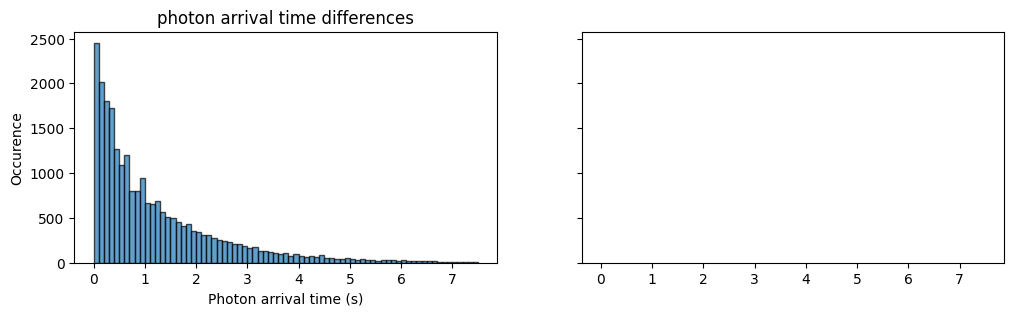

In [227]:
"""
Detailed rate analysis.

"""
########################################## Plot histogram of photon arrival times

for i in range(iterations):
    fig, axs = plt.subplots(1, 2, figsize=(12, 3), sharey=True, sharex=True)
    time_diffs = np.diff(BothSPCMs_tStamps_filtered_iAll[i])
    data_temp = np.sort(time_diffs) ### sorted so we can easily select and zoom into short times, for example.
    data = data_temp[0:-100] ### In case the last few times are too long, remove them from the data.

    bin_width = 0.1  ### in seconds
    Bins = np.arange(data.min(), data.max() + bin_width, bin_width)
    
    axs[0].hist(data, bins=Bins, edgecolor='black', alpha=0.7, log=False) ### log=True applies log-scale to y-axis
    axs[0].set_xlabel("Photon arrival time (s)")
    axs[0].set_ylabel("Occurence")
    axs[0].set_title("photon arrival time differences")
    
    # axs[1].hist(SPCM1_rel_tStamps_iAll[i], bins=100, edgecolor='black', alpha=0.7)
    # axs[1].set_xlabel("detection time (ns)")
    # axs[1].set_title("SPCM1 photons");